In [3]:
import envs.door_key
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('..')

from envs.random_walk import RandomWalkEnv
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy

from collections import deque

from tqdm.notebook import tqdm

from utils.logging import EvalLogCallback

from envs.door_key import DoorKeyEnv, DoorKeyEnvSmall

from utils.runner import run_for_episode, run_for_steps
from algorithms.random_policy import RandomPolicy
from stable_baselines3.common.env_util import make_vec_env
from minigrid.wrappers import FlatObsWrapper, ImgObsWrapper

pygame 2.5.2 (SDL 2.28.2, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


0it [00:00, ?it/s]

Output()

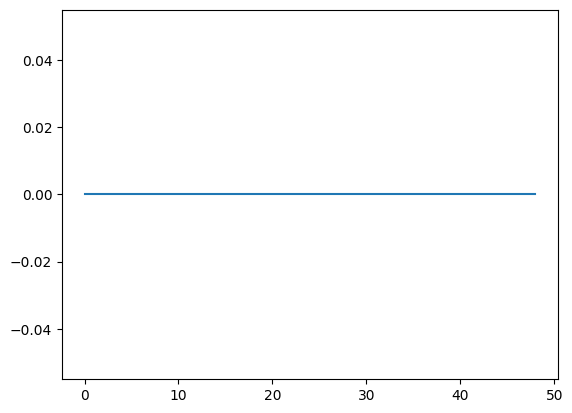

In [5]:
# https://minigrid.farama.org/api/wrapper/
# ImgObsWrapper removes mission from observationSpace

env = ImgObsWrapper(DoorKeyEnvSmall())
# eval_env = ImgObsWrapper(DoorKeyEnvSmall(render_mode='human'))
eval_env = env

# todo later we can vectorize the operations to make it faster
agent = PPO('MlpPolicy', env)
callback = EvalLogCallback(eval_every=1, smooth_window=2, model=agent, eval_env=eval_env)
agent.learn(total_timesteps=100000, progress_bar=True, callback=callback)
callback.plot_rewards()

In [10]:
eval_env = ImgObsWrapper(DoorKeyEnvSmall(render_mode='human'))

# policy = RandomPolicy(env)
policy = agent
run_for_episode(env=eval_env, policy=policy)
eval_env.close()